# **Phishing Domain  Detection**

### **Description**
These data consist of a collection of legitimate as well as phishing website instances. Each website is represented by the set of features which denote, whether website is legitimate or not. Data can serve as an input for machine learning process.

Full variant - **dataset_full.csv**

Short description of the full variant dataset:

Total number of instances: **88,647**

Number of legitimate website instances (labeled as 0): **58,000**

Number of phishing website instances (labeled as 1): **30,647**

Total number of features: **111**

### **importing necessary Library**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings
warnings.filterwarnings("ignore")

In [2]:
full_df= pd.read_csv("../dataset/dataset_full.csv")
small_df=pd.read_csv("../dataset/dataset_small.csv")
full_df.head(4)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1


In [3]:
full_df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [4]:
full_df['url_shortened'].unique()

array([0, 1], dtype=int64)

In [5]:
print(small_df.head(4))

   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                4   
1                    0              0  ...                1                4   
2                    0              0  ...                1                2   
3  

In [6]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB
None


In [7]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


### There are total 88647 entries(rows) and 112 features in a dataframe


**Every Features are in a numerical format including our target dependent feature.** 

**1**: stands for phishing website(unsafe website).

**0**: stands for safe website.



# Lets check duplicates and null Values are there are not

In [8]:
print(full_df.isnull().sum())


qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


In [9]:
print(small_df.isnull().sum())

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


In [10]:
full_df.duplicated().sum()

1438

In [11]:
small_df.duplicated().sum()

1240

In [12]:
#Lets drop Duplicated Values
full_df=full_df.drop_duplicates()
small_df=small_df.drop_duplicates()

### **Lets check our target features is  binary classification or not...and also we observe they equally balanced or not , in case of imbalance feature we use resample technique for it.**

In [13]:
print(full_df["phishing"].unique())
print(small_df["phishing"].unique())

[1 0]
[0 1]


In [14]:
full_df_phishing_count=full_df["phishing"].value_counts().reset_index()
full_df_phishing_count.columns=["Label" , "Count"]
full_df_phishing_count=full_df_phishing_count.replace(to_replace={0:"safe" , 1:"phishing"})
full_df_phishing_count

,Label,Count
0,safe,56712
1,phishing,30497


In [15]:
small_df_phishing_count=small_df["phishing"].value_counts().reset_index()
small_df_phishing_count.columns=["Label" , "Count"]
small_df_phishing_count=small_df_phishing_count.replace(to_replace={0:"safe" , 1:"phishing"})
small_df_phishing_count

,Label,Count
0,phishing,30497
1,safe,26908


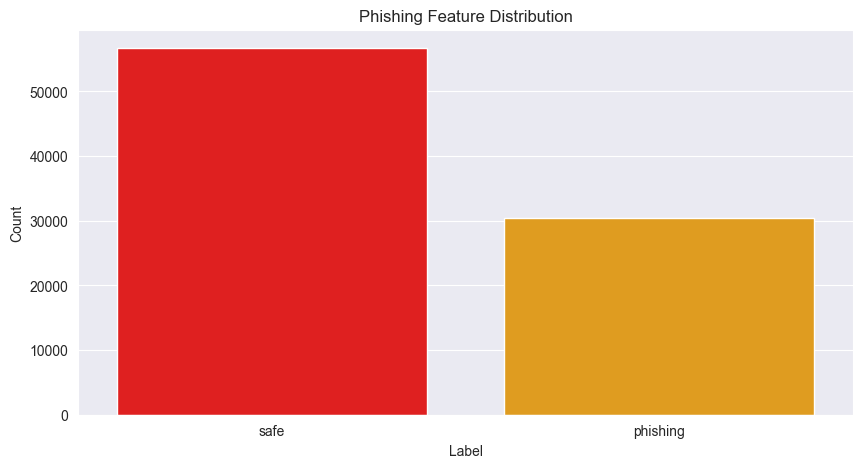

In [16]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.barplot(data=full_df_phishing_count , x="Label" , y="Count" , palette=["red" ,"orange"])
plt.title("Phishing Feature Distribution")
plt.show()


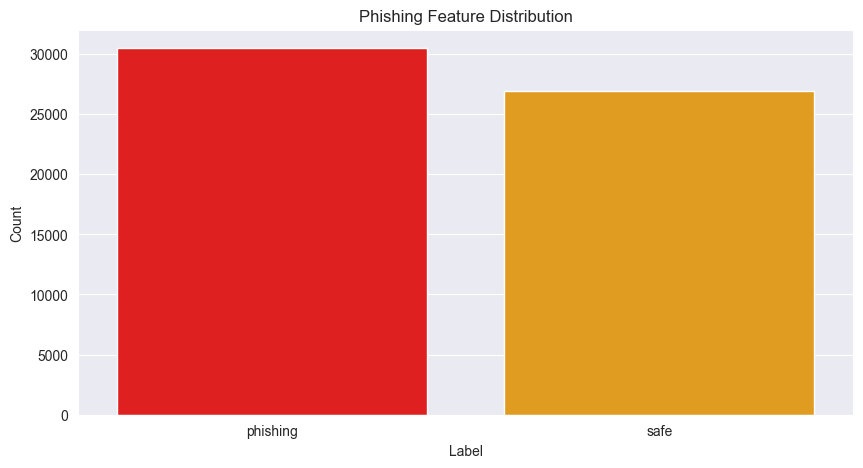

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.barplot(data=small_df_phishing_count , x="Label" , y="Count" , palette=["red" ,"orange"])
plt.title("Phishing Feature Distribution")
plt.show()


***There are Total  56712 entries for Not Phishing(safe) website and 30497 entries for phishing website . we can say thatthis feature is imbalanced , which can affect prediction accuracy***

# lets Observe Correlation between each columns

In [18]:
full_df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109755,0.127825,0.243291,0.417014,0.500545,0.169385,0.552435,0.004132,-0.000439,...,-0.063214,-0.012612,-0.053294,0.011170,-0.068419,-0.057495,-0.004743,-0.003073,-0.059715,0.169348
qty_hyphen_url,0.109755,1.000000,0.213698,0.303566,0.058711,0.173596,0.041547,0.126976,0.018205,0.018089,...,0.025099,0.034558,-0.029333,-0.032439,0.006769,-0.006227,-0.005333,0.005121,-0.010545,0.198264
qty_underline_url,0.127825,0.213698,1.000000,0.246468,0.068675,0.335205,0.056970,0.256687,0.062381,-0.000798,...,0.000039,0.025033,-0.009489,-0.028331,0.010832,-0.017920,-0.002619,0.002925,-0.012343,0.190425
qty_slash_url,0.243291,0.303566,0.246468,1.000000,0.177270,0.283607,0.101849,0.200648,0.025934,0.015081,...,-0.061963,-0.030451,-0.051798,-0.025224,-0.024428,-0.059597,-0.012159,0.003999,-0.001564,0.696940
qty_questionmark_url,0.417014,0.058711,0.068675,0.177270,1.000000,0.459398,0.127587,0.468384,0.018215,0.004459,...,-0.021856,-0.006854,-0.030493,-0.005564,-0.039563,-0.021285,0.001282,0.000355,0.013215,0.108468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.057495,-0.006227,-0.017920,-0.059597,-0.021285,-0.046399,-0.019930,-0.033764,0.003625,-0.007502,...,0.226987,0.064335,0.111770,-0.007906,0.287526,1.000000,0.033826,0.028499,0.048572,-0.078446
url_google_index,-0.004743,-0.005333,-0.002619,-0.012159,0.001282,-0.005022,-0.002321,-0.003579,-0.000993,-0.000412,...,0.038121,0.033677,0.019421,0.005795,0.023459,0.033826,1.000000,0.591636,-0.002187,-0.014996
domain_google_index,-0.003073,0.005121,0.002925,0.003999,0.000355,0.000641,-0.002275,-0.001002,-0.001259,-0.000522,...,0.033948,0.032515,0.020904,0.007216,0.025046,0.028499,0.591636,1.000000,-0.000247,-0.004293
url_shortened,-0.059715,-0.010545,-0.012343,-0.001564,0.013215,-0.011969,-0.005401,-0.010098,-0.002544,-0.001055,...,0.059464,0.085794,0.012539,-0.031997,0.036934,0.048572,-0.002187,-0.000247,1.000000,0.099177


In [19]:
small_df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.097133,0.119083,0.225155,0.424396,0.505161,0.168627,0.561035,0.001527,-0.001587,...,-0.063670,-0.028623,-0.051102,0.048451,-0.072265,-0.058051,-0.006452,-0.004562,-0.067729,0.136258
qty_hyphen_url,0.097133,1.000000,0.200845,0.264366,0.050686,0.154437,0.033232,0.112895,0.014640,0.016904,...,0.042832,0.033007,-0.012883,-0.025106,0.015210,0.008468,-0.004207,0.011202,-0.019842,0.136466
qty_underline_url,0.119083,0.200845,1.000000,0.215049,0.062071,0.322642,0.050404,0.246692,0.059885,-0.002072,...,0.004364,0.020195,0.001047,-0.022891,0.015620,-0.011695,-0.002367,0.005107,-0.019208,0.148584
qty_slash_url,0.225155,0.264366,0.215049,1.000000,0.170784,0.240875,0.084784,0.169375,0.015967,0.011589,...,-0.068303,-0.077098,-0.012391,0.090459,-0.029497,-0.039614,-0.014847,0.008949,-0.032265,0.591438
qty_questionmark_url,0.424396,0.050686,0.062071,0.170784,1.000000,0.456619,0.124652,0.465562,0.016815,0.003871,...,-0.024766,-0.011842,-0.031051,0.004310,-0.048313,-0.020972,0.003628,0.000737,0.010088,0.091468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.058051,0.008468,-0.011695,-0.039614,-0.020972,-0.044128,-0.019457,-0.032147,0.006107,-0.008152,...,0.251065,0.055685,0.097893,-0.019400,0.235614,1.000000,0.004232,0.001634,0.061684,-0.063756
url_google_index,-0.006452,-0.004207,-0.002367,-0.014847,0.003628,-0.006391,-0.003221,-0.004543,-0.001376,-0.000570,...,-0.000310,0.010300,-0.004299,-0.004392,0.002536,0.004232,1.000000,0.430627,-0.003034,-0.020653
domain_google_index,-0.004562,0.011202,0.005107,0.008949,0.000737,0.001492,-0.003449,-0.001275,-0.001927,-0.000799,...,-0.001749,0.006987,0.003308,-0.006847,0.013236,0.001634,0.430627,1.000000,-0.000234,-0.006198
url_shortened,-0.067729,-0.019842,-0.019208,-0.032265,0.010088,-0.020633,-0.008515,-0.016150,-0.003872,-0.001605,...,0.074328,0.098293,0.021113,-0.049610,0.046068,0.061684,-0.003034,-0.000234,1.000000,0.083367


# **Lets drop Highly correlated features**

In [20]:
#Selecting Independent and Dependent feature
X1=full_df.drop("phishing" , axis=1)
X2=small_df.drop("phishing" , axis=1)
y1=full_df["phishing"]
y2=small_df["phishing"]

In [21]:
# Compute absolute correlation matrix
corr_matrix = X1.corr().abs()

# Set a threshold for high correlation
threshold = 0.6

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features to drop
to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

# Drop correlated features from both X1 and X2
X1 = X1.drop(columns=to_drop)
X2 = X2.drop(columns=to_drop)

# Print results
print("=== Correlation Filter Report ===")
print(f"Original Number of Features:  {corr_matrix.shape[1]}")
print(f"Number of Dropped Features:   {len(to_drop)}")
print(f"Number of Features Remaining: {X1.shape[1]}")
print("\nRemaining Columns:\n", X1.columns.tolist())


=== Correlation Filter Report ===
Original Number of Features:  111
Number of Dropped Features:   57
Number of Features Remaining: 54

Remaining Columns:
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_in_ip', 'server_client_domain', 'qty_hyphen_params', 'qty_slash_params', 'qty_percent_params', 'time_response', 'domain_spf', 'asn_ip', 'time_domain_a

In [22]:
#X_train , y_train=X1 , y1
#X_test , y_test=X2 ,y2

In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test  , y_train , y_test= train_test_split(X1 , y1 , test_size=0.2 , random_state=42)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [25]:
y_train.value_counts()

0    45348
1    45348
Name: phishing, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

models = {
    "RandomForest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
    
}

In [27]:
def model_training(models , X_train , X_test , y_train , y_test):
    results=[]
    print(f'{">"*20 } Started Training Model {"<"*20}')
    for name ,model in models.items():
       
       print(f'\n\nTraining \n{name} Model.....')
       model.fit(X_train ,y_train)
       y_pred=model.predict(X_test)
       
       accu_score=accuracy_score(y_test , y_pred)
       print(f"Accuracy Score for this Model {name} is : {accu_score}")
       pre_score=precision_score(y_test ,y_pred)
       rec_score=recall_score(y_test,y_pred)
       f1score=f1_score(y_test,y_pred)
       
       results.append({"Model":name , 
                       "accuarcy_score":accu_score ,
                       "precision_score":pre_score ,
                       "recall_score":rec_score ,
                       "f1_score":f1score
                        })
   
    results=pd.DataFrame(results)
    return results   

In [28]:
model_training(models , X_train , X_test , y_train , y_test)

>>>>>>>>>>>>>>>>>>>> Started Training Model <<<<<<<<<<<<<<<<<<<<


Training 
RandomForest Classifier Model.....
Accuracy Score for this Model RandomForest Classifier is : 0.9657722738218094


Training 
XGBClassifier Model.....
Accuracy Score for this Model XGBClassifier is : 0.9623896342162596


Training 
DecisionTreeClassifier Model.....
Accuracy Score for this Model DecisionTreeClassifier is : 0.9495470702901043


Training 
AdaBoostClassifier Model.....
Accuracy Score for this Model AdaBoostClassifier is : 0.9232312808164201


,Model,accuarcy_score,precision_score,recall_score,f1_score
0,RandomForest Classifier,0.965772,0.939676,0.963639,0.951507
1,XGBClassifier,0.962390,0.933760,0.960184,0.946788
2,DecisionTreeClassifier,0.949547,0.920414,0.936163,0.928222
3,AdaBoostClassifier,0.923231,0.852028,0.943567,0.895464


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
# Define the model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    random_state=42 , 
    min_samples_split=2,
    max_features='log2',
    min_samples_leaf=1

)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test
y_pred = rf_model.predict(X_test)

# --- Step 3: Evaluate ---
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     11364
           1       0.94      0.96      0.95      6078

    accuracy                           0.97     17442
   macro avg       0.96      0.96      0.96     17442
weighted avg       0.97      0.97      0.97     17442

📊 Confusion Matrix:
 [[10969   395]
 [  215  5863]]


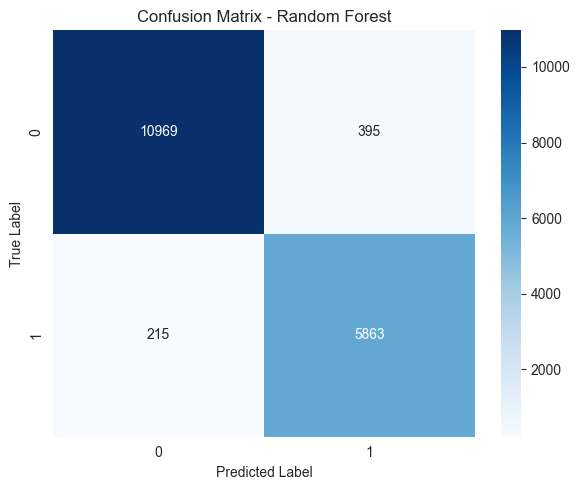

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions and confusion matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


In [31]:
train_pred=rf_model.predict(X_train)
test_pred=rf_model.predict(X_test)
train_accuracy=accuracy_score(y_train , train_pred)
val_accuracy=accuracy_score(y_test , test_pred)
print(f"=="*20)
print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score : {val_accuracy}")
print(f"=="*20)
print(f'Train Precision Score :{precision_score(y_train ,train_pred)}')
print(f'Test Precision Score :{precision_score(y_test ,test_pred)}')
print(f"=="*20)
print(f'Train Recall Score : {recall_score(y_train,train_pred)}')
print(f'Test Recall Score : {recall_score(y_test,test_pred)}')
print(f"=="*20)
print(f'Train F1 Score : {f1_score(y_train,train_pred)}')
print(f'Test F1 Score : {f1_score(y_test,test_pred)}')
print(f"=="*20)

Train Accuracy Score : 0.999206139190262
Test Accuracy Score : 0.9650269464510951
Train Precision Score :0.9993382742191635
Test Precision Score :0.9368807925854906
Train Recall Score : 0.9990738290553056
Test Recall Score : 0.9646265218821981
Train F1 Score : 0.999206034140532
Test F1 Score : 0.9505512321660181


In [32]:
y_proba_for_train=rf_model.predict_proba(X_train)[:,1]
y_proba_for_test=rf_model.predict_proba(X_test)[:,1]

In [33]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

def plot_model_evaluation(y_true, y_pred_proba, history=None , title=""):
    """
    Plots the ROC curve and training/validation accuracy from a model's performance.

    Parameters:
        y_true (array-like): Ground truth binary labels.
        y_pred_proba (array-like): Predicted probabilities for the positive class.
        history (keras.callbacks.History or dict, optional): Training history containing 'accuracy' and 'val_accuracy'.
    """

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    axes[0].plot(fpr, tpr, color="#1f77b4", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'{title} Receiver Operating Characteristic (ROC)', fontsize=14)
    axes[0].legend(loc="lower right")
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Plot Accuracy if history is provided
    if history is not None:
        if hasattr(history, 'history'):  # keras History object
            acc = history.history.get('accuracy') or history.history.get('acc')
            val_acc = history.history.get('val_accuracy') or history.history.get('val_acc')
        else:  # dict
            acc = history.get('accuracy') or history.get('acc')
            val_acc = history.get('val_accuracy') or history.get('val_acc')

        if acc and val_acc:
            epochs = range(1, len(acc) + 1)
            axes[1].plot(epochs, acc, label='Train Accuracy', color='#2ca02c', marker='o')
            axes[1].plot(epochs, val_acc, label='Validation Accuracy', color='#d62728', marker='s')
            axes[1].set_title('Training vs Validation Accuracy', fontsize=14)
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Accuracy')
            axes[1].legend()
            axes[1].grid(True, linestyle='--', alpha=0.6)
        else:
            axes[1].text(0.5, 0.5, 'No accuracy data available.', ha='center', va='center')

    else:
        axes[1].axis('off')  # Hide the second plot if no history

    plt.tight_layout()
    plt.show()


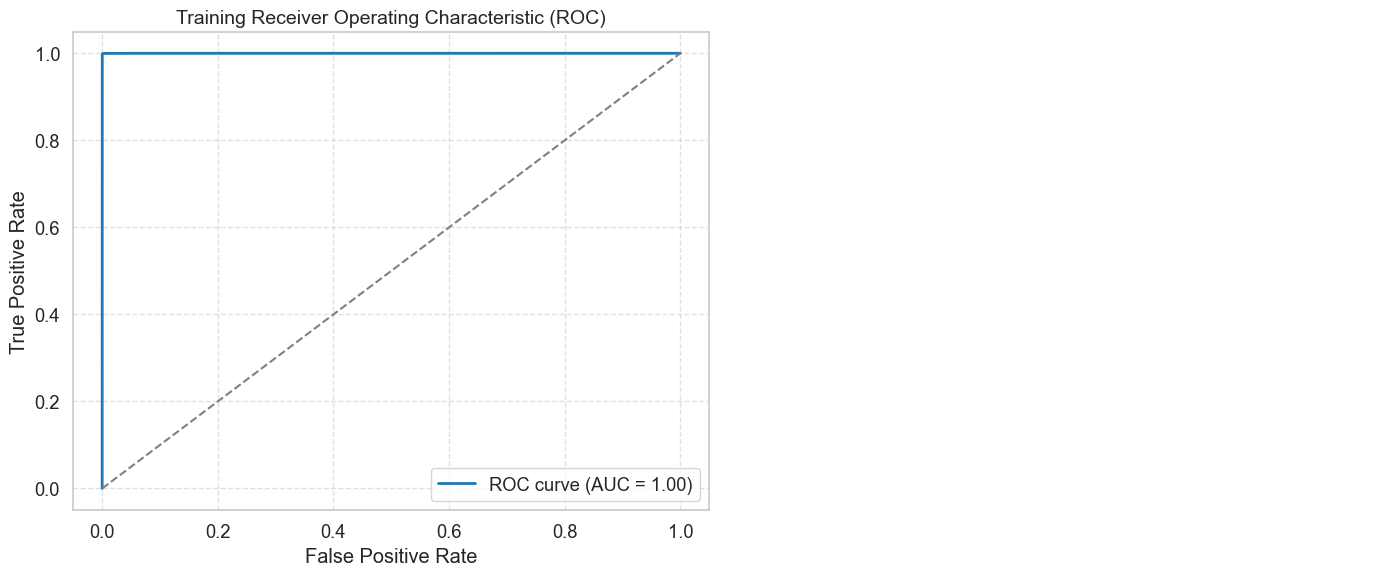

In [34]:
plot_model_evaluation(y_true=y_train , y_pred_proba=y_proba_for_train , title="Training")

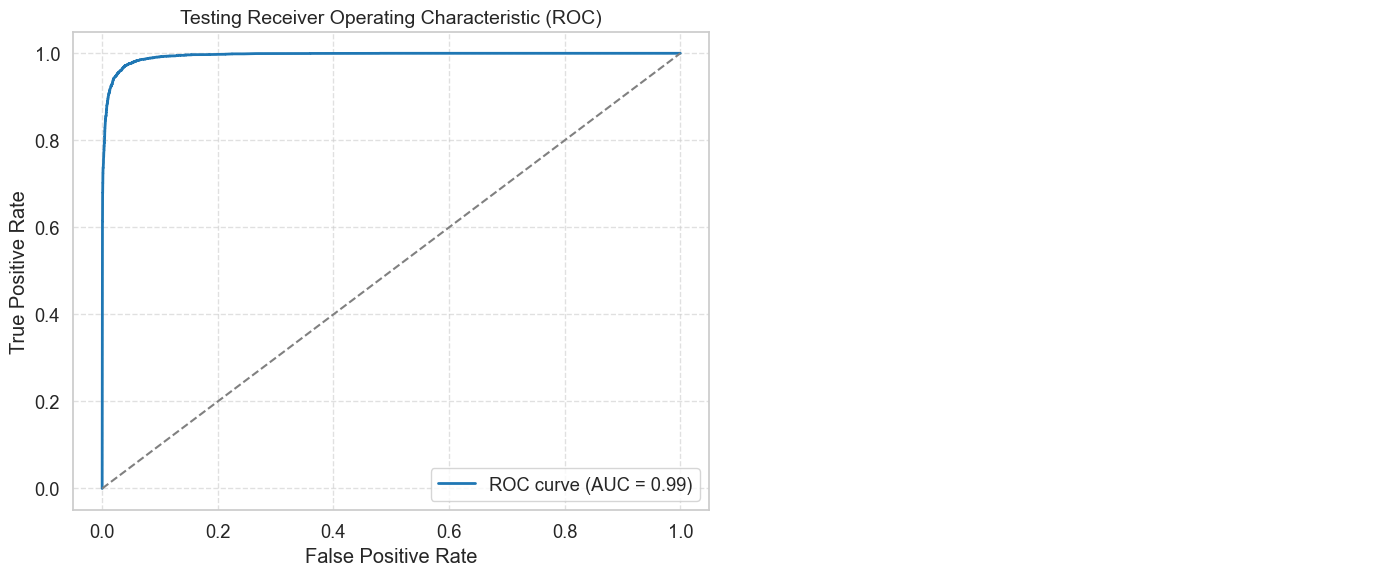

In [35]:
plot_model_evaluation(y_true=y_test , y_pred_proba=y_proba_for_test , title="Testing")

In [36]:
# Function to plot top feature importances
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importances(model, feature_names, top_n=25):
    """
    Plot the top_n feature importances from a tree-based model.
    Args:
        model: Trained model with feature_importances_ attribute.
        feature_names: List of feature names corresponding to model inputs.
        top_n: Number of top features to display.
    """
    importances = model.feature_importances_
    indices = importances.argsort()[::-1][:top_n]
    top_features = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_importances, y=top_features)
    plt.title(f"Top {top_n} Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    return top_features


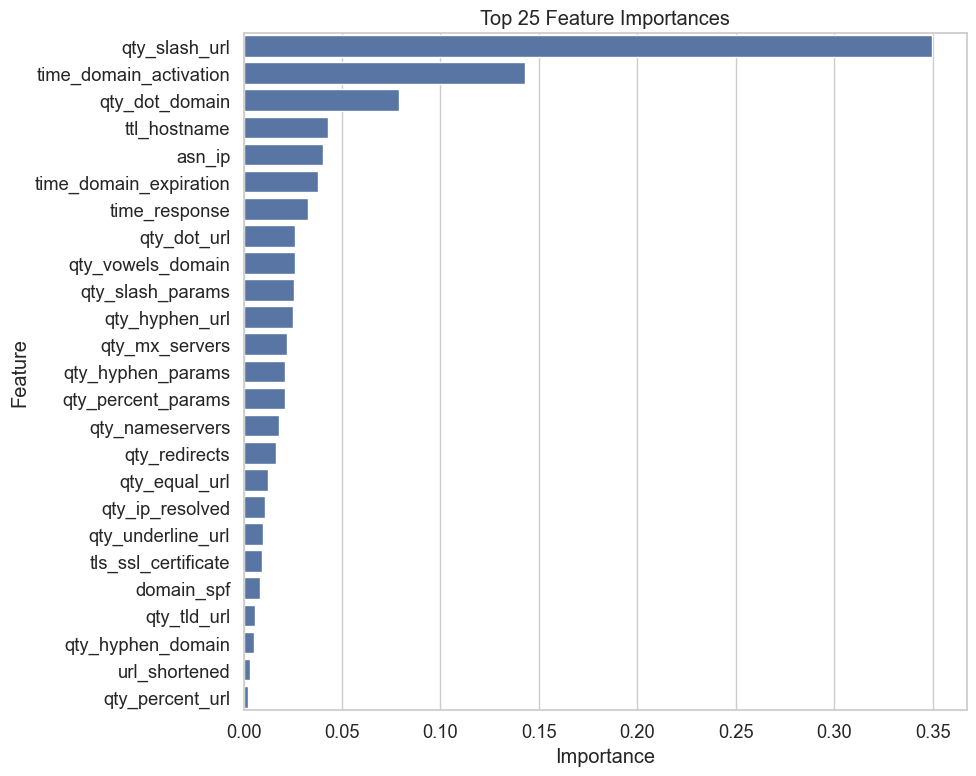

In [37]:
# After training or loading your RandomForest:
feature_names = X_train.columns.tolist()
top_features=plot_feature_importances(rf_model, feature_names, top_n=25)


In [38]:
top_features

['qty_slash_url',
 'time_domain_activation',
 'qty_dot_domain',
 'ttl_hostname',
 'asn_ip',
 'time_domain_expiration',
 'time_response',
 'qty_dot_url',
 'qty_vowels_domain',
 'qty_slash_params',
 'qty_hyphen_url',
 'qty_mx_servers',
 'qty_hyphen_params',
 'qty_percent_params',
 'qty_nameservers',
 'qty_redirects',
 'qty_equal_url',
 'qty_ip_resolved',
 'qty_underline_url',
 'tls_ssl_certificate',
 'domain_spf',
 'qty_tld_url',
 'qty_hyphen_domain',
 'url_shortened',
 'qty_percent_url']

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
# Define the model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    random_state=42 , 
    min_samples_split=2,
    max_features='log2',
    min_samples_leaf=1

)

# Fit the model
rf_model.fit(X_train[top_features], y_train)

# Predict on test
y_pred = rf_model.predict(X_test[top_features])

# --- Step 3: Evaluate ---
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     11364
           1       0.94      0.96      0.95      6078

    accuracy                           0.97     17442
   macro avg       0.96      0.97      0.96     17442
weighted avg       0.97      0.97      0.97     17442

📊 Confusion Matrix:
 [[10994   370]
 [  223  5855]]


In [40]:
import dill
with open("../saved_model/0/model.pkl" ,"wb") as file:
   dill.dump(rf_model , file)